## NINO SST Indices

**There are several indices used to monitor the tropical Pacific, all of which are based on SST anomalies averaged across a given region.**

**Several kinds of Niño Index Regions are used to calculate the Niño Indices:**  
![jupyter](./regions.png)

**Niño 1+2 (0-10S, 90W-80W)**  
The Niño 1+2 region is the smallest and eastern-most of the Niño SST regions, and corresponds with the region of coastal South America where El Niño was first recognized by the local populations.  This index tends to have the largest variance of the Niño SST indices.

**Niño 3 (5N-5S, 150W-90W)**  
This region was once the primary focus for monitoring and predicting El Niño, but researchers later learned that the key region for coupled ocean-atmosphere interactions for ENSO lies further west (Trenberth, 1997).  Hence, the Niño 3.4 and ONI became favored for defining El Niño and La Niña events.

**Niño 3.4 (5N-5S, 170W-120W)**  
The  Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast.  The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

**Niño 4 (5N-5S, 160E-150W)**  
The  Niño 4 index captures SST anomalies in the central equatorial Pacific.  This region tends to have less variance than the other Niño regions.

**ONI (5N-5S, 170W-120W)**  
The ONI (Oceanic Niño Index) uses the same region as the Niño 3.4 index.  The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña, the anomalies must exceed +0.5C or -0.5C for at least five consecutive months.  This is the operational definition used by NOAA.

**Usually the anomalies are computed relative to a base period of 30 years.**  

**The Niño 3.4 index and the ONI are the most commonly used indices to define El Niño and La Niña events.**  

**In this tutorial, we will plot the SST data and do some simple analyses.**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

**One of the standard global SST products is readily available from NOAA:
http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html.**  
**We will use the monthly-averaged version.**

In [2]:
ncfile1 = '~/project/mc2019/public/Tutorial-03/sst.mnmean.nc'
ds1 = xr.open_dataset(ncfile1)
print(ds1)

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

**Land mask file is used to mask out the land area.**

In [3]:
ncfile2 = '~/project/mc2019/public/Tutorial-03/lsmask.nc'
ds2 = xr.open_dataset(ncfile2)
print(ds2)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-10-29
Data variables:
    mask     (time, lat, lon) float32 ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [4]:
# Read variables
time = ds1['time'][:]
lat  = ds1['lat'][:]                       
lon  = ds1['lon'][:]
sst  = ds1['sst'][:,:,:]
mask = ds2['mask'][0,:,:]

In [5]:
# Mask out the land area of global SST
for i in range(0,180):
    for j in range(0,360):
        if mask[i,j]==0:
            sst[:,i,j] = 'NaN'

### 1.  Plot the global SST of December 2015

In [6]:
# Set up the map.
def plotmap():
    plt.figure(figsize=(15,10))
    plt.rcParams['figure.figsize'] = (15, 10)
    
    #Set the projection information
    proj = ccrs.PlateCarree(central_longitude=180)
    #Create a figure with an axes object and ass the projection to that axes.
    fig,ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    # Set X and Y axes
    ax.set_xticks([0,60,120,180,240,300,360],crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='both',labelsize=13)

    # Add coastlines
    ax.coastlines(zorder=10)
    
    # Add gridlines
    ax.gridlines(xlocs=np.arange(0,361,30), ylocs=np.arange(-90,91,30))
    
    return fig,ax

<Figure size 1080x720 with 0 Axes>

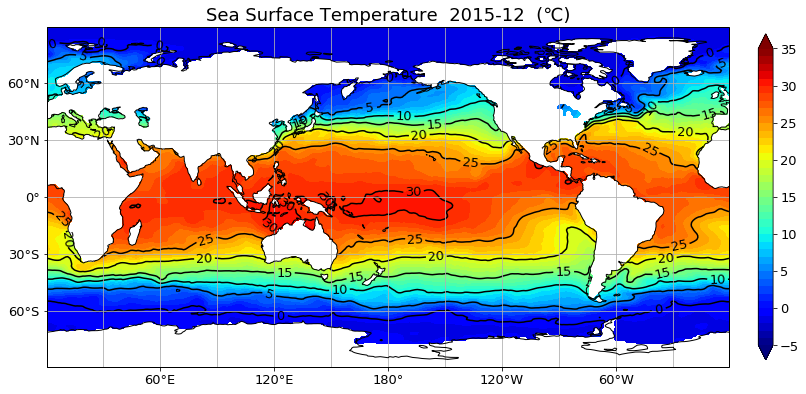

In [7]:
fig,ax = plotmap()

# Select the SST of 2015-12, and mask it
plotx_data = sst.sel(time='2015-12-01').values

# Set the plot for filled contours
levelx = np.arange(-5,36,1)
plotx_plot = ax.contourf(lon,lat,plotx_data,levels=levelx,cmap='jet',extend='both',zorder=1,transform=ccrs.PlateCarree())

# Set the plot for isothermal lines
levelx2 = np.arange(-5,36,5)
plotx_plot2 = ax.contour(lon,lat,plotx_data,levels=levelx2,colors='k',zorder=2,transform=ccrs.PlateCarree())

# Add labels to isothermal lines
plt.clabel(plotx_plot2,levelx2,inline=True,fmt='%1i',fontsize=13)

# Set the colorbar
cbar = plt.colorbar(plotx_plot,shrink=0.6,pad=0.035)
cbar.ax.tick_params(labelsize=13)

# Add title
ax.set_title('Sea Surface Temperature  2015-12  (℃)',fontsize=18)

plt.show()

### 2.  Compute the SST anomalies

**There have been several “super” El Niños until now, e.g., in 1982-83, 1997-98, and 2015-16. Here, we select the case of 1997-98 and plot the distribution of SST anomalies.**  

**Calculate the 30-year monthly mean SST (we select 1986~2015 here):**

In [8]:
# Select the 30-year period
sst_30y = sst.sel(time=slice('1986','2015'))

# Calculate the monthly mean SST
sstmean = np.zeros((12,180,360))
for i in range(0,12):
    month = sst_30y.isel(time=slice(i,360,12)).values
    monthmean = np.mean(month,axis=0)
    sstmean[i,:,:] = monthmean[:,:]

**Plot the SST anomaly of December 1997. We can see a very strong El Niño in this month.**

<Figure size 1080x720 with 0 Axes>

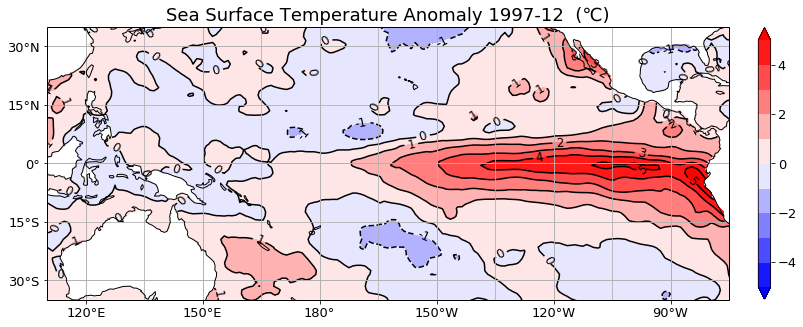

In [9]:
fig,ax = plotmap()

# Change the setting of X and Y axes
ax.set_xticks([120,150,180,210,240,270],crs=ccrs.PlateCarree())
ax.set_yticks([-30,-15,0,15,30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis='both',labelsize=13)

# Change the setting of gridlines
ax.gridlines(xlocs=np.arange(90,301,15), ylocs=np.arange(-45,46,15))

# Compute the SST anomaly
plotx_data = sst.sel(time='1997-12-01').values - sstmean[11,:,:]

# Set the plot for filled contours
levelx = np.arange(-5,6,1)
plotx_plot = ax.contourf(lon,lat,plotx_data,levels=levelx,cmap='bwr',extend='both',zorder=1,transform=ccrs.PlateCarree())

# Set the plot for isothermal lines
levelx2 = np.arange(-5,6,1)
plotx_plot2 = ax.contour(lon,lat,plotx_data,levels=levelx2,colors='k',zorder=2,transform=ccrs.PlateCarree())

# Focus on the tropical Pacific Ocean
ax.set_extent([110, 285, -35, 35], crs=ccrs.PlateCarree())

# Add labels to isothermal lines
plt.clabel(plotx_plot2,levelx2,inline=True,fmt='%1i',fontsize=12)

# Set the colorbar
cbar = plt.colorbar(plotx_plot,shrink=0.5,pad=0.035)
cbar.ax.tick_params(labelsize=13)
    
# Add title
ax.set_title('Sea Surface Temperature Anomaly 1997-12  (℃)',fontsize=18)

plt.show()

**Compute area averaged SST anomalies from Niño 3.4 region (Niño 3.4 index).**

In [10]:
# Select the Niño 3.4 region
# Niño 3.4 (5N-5S, 170W-120W)
region34 = sst.sel(time=slice('1982','2018')).sel(lat=np.arange(4.5,-5.5,-1)).sel(lon=np.arange(190.5,240.5,1))
ctime = time.sel(time=slice('1982','2018'))
region34_mean = np.mean(region34,axis=(1,2))

**Firstly, plot the time series of average SST of Niño 3.4 region:**

<Figure size 864x288 with 0 Axes>

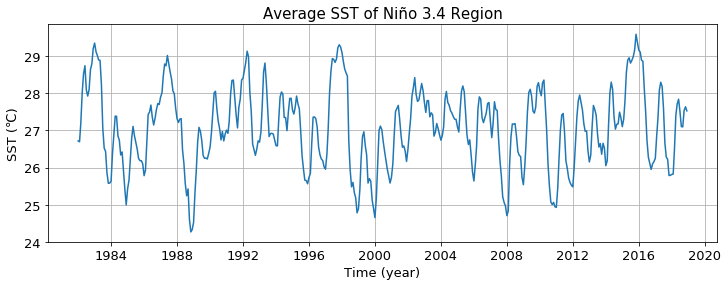

In [11]:
fig = plt.figure(figsize=(12,4))
plt.rcParams['figure.figsize'] = (12,4)

fig, ax = plt.subplots()

ax.plot(ctime,region34_mean)
ax.tick_params(axis='both',labelsize=13)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('SST (℃)',fontsize=13)
ax.set_title('Average SST of Niño 3.4 Region',fontsize=15)
ax.grid()

plt.show()

**Plot the time series of average SST anomalies of Niño 3.4 region:**

In [12]:
# Calculate the monthly mean SST of Niño 3.4 region
region34_m_mean = np.zeros(12)
for i in range(0,12):
    region34_m_mean[i] = np.mean(region34_mean.isel(time=np.arange(i,360,12)).values)

# Calculate the anomalies
# Subtract the monthly mean SST to detrend the seasonal variation
region34_anoma = np.zeros(37*12)
for i in range(0,37*12):
    k = i % 12
    region34_anoma[i] = region34_mean.values[i] - region34_m_mean[k]

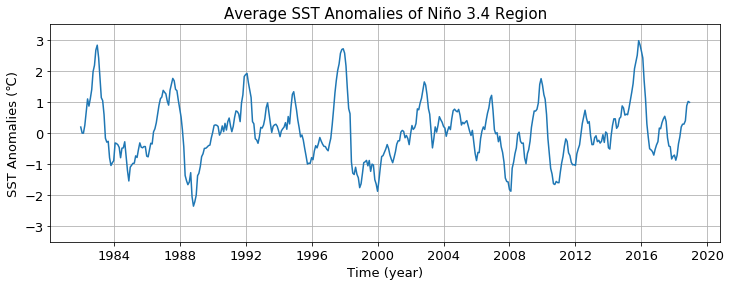

In [13]:
fig, ax = plt.subplots()

ax.plot(ctime,region34_anoma)
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('SST Anomalies (℃)',fontsize=13)
ax.set_title('Average SST Anomalies of Niño 3.4 Region',fontsize=15)
ax.grid()

plt.show()

**Plot the time series of Niño 3.4 Index.**  
**We can see three “super” El Niños in this figure, i.e., in 1982-83, 1997-98, and 2015-16.**

In [14]:
# Smooth the anomalies with a 5-month running mean
nstep = int(37*12-(5-1)/2*2)
index_34 = np.zeros(nstep)
for i in range(0,nstep):
    index_34[i] = np.mean(region34_anoma[i:i+5])

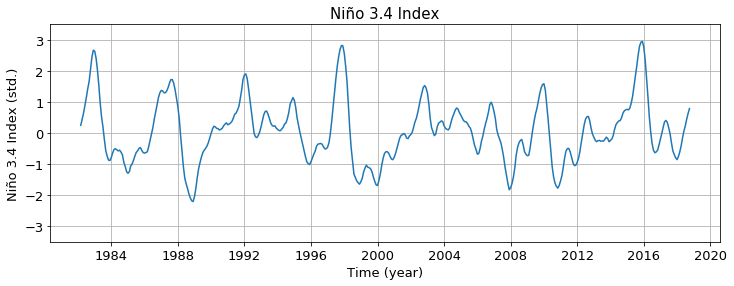

In [15]:
# Make the time series match the data
xtime = ctime.isel(time=np.arange(2,37*12-2)).values

# Normalize the smoothed values by its standard deviation over the period.
n_index_34 = index_34 / np.std(index_34)

fig, ax = plt.subplots()

ax.plot(xtime,n_index_34)
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('Niño 3.4 Index (std.)',fontsize=13)
ax.set_title('Niño 3.4 Index',fontsize=15)
ax.grid()

plt.show()

**Plot the time series of ONI (Oceanic Niño Index) :**  
**We can see three “super” El Niños in this figure, i.e., in 1982-83, 1997-98, and 2015-16.**

In [16]:
# Smooth the anomalies with a 3-month running mean
nstep = int(37*12-(3-1)/2*2)
index_oni = np.zeros(nstep)
for i in range(0,nstep):
    index_oni[i] = np.mean(region34_anoma[i:i+3])

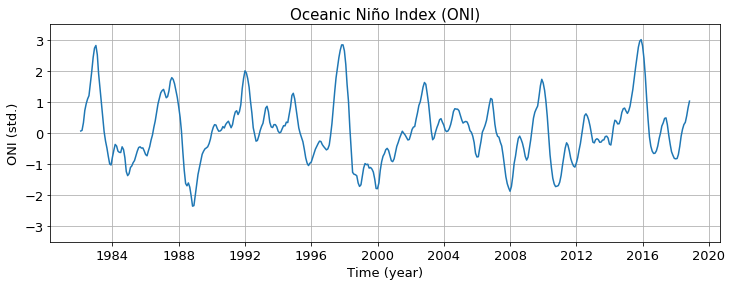

In [17]:
# Make the time series match the data
xtime = ctime.isel(time=np.arange(1,37*12-1)).values

# Normalize the smoothed values by its standard deviation over the period.
n_index_oni = index_oni / np.std(index_oni)

fig, ax = plt.subplots()

ax.plot(xtime,n_index_oni)
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('ONI (std.)',fontsize=13)
ax.set_title('Oceanic Niño Index (ONI)',fontsize=15)
ax.grid()

plt.show()

### 3. Analyze the  correlations between ONI and OLR (Outgoing Longwave Radiation)

OLR data is available at: https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.otherflux.html

In [18]:
# Read the OLR file
ncfile3 = '~/project/mc2019/public/Tutorial-03/ulwrf.ntat.mon.mean.nc'
ds3 = xr.open_dataset(ncfile3)
print(ds3)

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 862)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-10-01
Data variables:
    ulwrf    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:38:16 1999: ncrcat ulwrftop.mon.mean.nc /Da...
    title:          monthly mean ulwrf.ntat from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1


In [19]:
# Match the time series of ONI
OLR = ds3['ulwrf'].sel(time=slice('1982-02','2018-11')).values
lat_OLR = ds3['lat']
lon_OLR = ds3['lon']

In [20]:
# Compute the correlation coefficients of OLR and ONI
OLR_ONI_r = np.zeros((94,192))
for i in range(0,94):
    for j in range(0,192):
        OLR_ONI_r[i,j] = np.corrcoef(OLR[:,i,j],n_index_oni[:])[0,1]

<Figure size 1080x720 with 0 Axes>

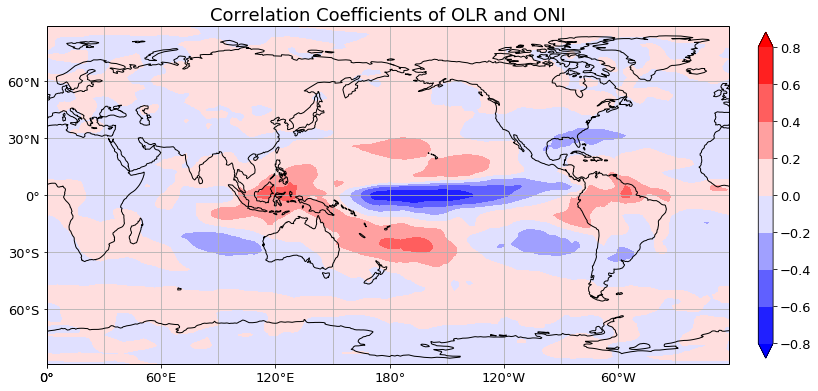

In [21]:
fig,ax = plotmap()

plotx_data = OLR_ONI_r[:,:]

# Set the plot for filled contours
levelx = np.arange(-0.8,0.81,0.2)
plotx_plot = ax.contourf(lon_OLR,lat_OLR,plotx_data,levels=levelx,cmap='bwr',extend='both',zorder=1,transform=ccrs.PlateCarree())

# Set the colorbar
cbar = plt.colorbar(plotx_plot,shrink=0.6,pad=0.035)
cbar.ax.tick_params(labelsize=13)

# Add title
ax.set_title('Correlation Coefficients of OLR and ONI',fontsize=18)

plt.show()